<a href="https://colab.research.google.com/github/denizgcs/spotify_dataSet_veri_analizi/blob/master/spotify_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("spotify_churn_dataset.csv")
df.info()
df.describe()
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


user_id  gender  age country subscription_type  listening_time  \
0        1  Female   54      CA              Free              26   
1        2   Other   33      DE            Family             141   
2        3    Male   38      AU           Premium             199   
3        4  Female   22      CA           Student              36   
4        5   Other   29      US            Family             250   

   songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                    23       0.20     Desktop                     31   
1                    62       0.34         Web                      0   
2                    38       0.04      Mobile                      0   
3                     2       0.31      Mobile                      0   
4                    57       0.36      Mobile                      0   

   offline_listening  is_churned  
0                  0           1  
1                  1           0  
2                  1           1  
3                  1           0  
4                  1           1

<Axes: xlabel='age', ylabel='skip_rate'>

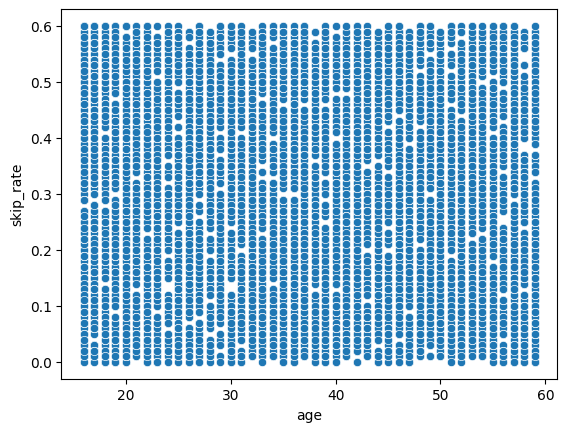

In [ ]:
sns.scatterplot(data=df,x="age",y="skip_rate")

In [ ]:
df["offline_listening"]=df["offline_listening"].astype("object")

In [ ]:
bins = [0, 17, 25, 35, 45, 55, 65]
labels = ["0-17", "18-25", "26-35", "36-45", "46-55", "56-65"]

# Ya≈ülarƒ± kategorilere ayƒ±r
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True, include_lowest=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   user_id                8000 non-null   int64   
 1   gender                 8000 non-null   object  
 2   age                    8000 non-null   int64   
 3   country                8000 non-null   object  
 4   subscription_type      8000 non-null   object  
 5   listening_time         8000 non-null   int64   
 6   songs_played_per_day   8000 non-null   int64   
 7   skip_rate              8000 non-null   float64 
 8   device_type            8000 non-null   object  
 9   ads_listened_per_week  8000 non-null   int64   
 10  offline_listening      8000 non-null   object  
 11  is_churned             8000 non-null   int64   
 12  age_group              8000 non-null   category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 758.2+ KB


In [ ]:
df["skip_rate"].unique()

array([0.2 , 0.34, 0.04, 0.31, 0.36, 0.46, 0.38, 0.11, 0.29, 0.56, 0.6 ,
       0.44, 0.26, 0.23, 0.41, 0.35, 0.45, 0.1 , 0.42, 0.59, 0.53, 0.33,
       0.3 , 0.22, 0.39, 0.17, 0.43, 0.18, 0.06, 0.5 , 0.54, 0.51, 0.4 ,
       0.48, 0.58, 0.08, 0.  , 0.32, 0.49, 0.14, 0.21, 0.05, 0.19, 0.47,
       0.24, 0.03, 0.37, 0.15, 0.25, 0.07, 0.02, 0.12, 0.27, 0.13, 0.16,
       0.52, 0.09, 0.28, 0.01, 0.55, 0.57])

<!-- G√∂rsel Ba≈ülƒ±k Kartƒ± -->
<style>
  .analysis-hero{
    --bg: linear-gradient(135deg,#f6f9ff, #eef4ff);
    --fg:#0f172a; --muted:#475569; --accent:#4f46e5; --ring:#93c5fd;
    border-radius:18px; padding:20px 22px; margin:16px 0 24px;
    background:var(--bg); border:1px solid #e5e7eb;
    box-shadow:0 6px 24px rgba(79,70,229,.10);
  }
  .analysis-hero h1{
    margin:0 0 6px; font:700 22px/1.25 ui-sans-serif,system-ui,Segoe UI,Roboto;
    color:var(--fg); letter-spacing:.2px; display:flex; align-items:center; gap:10px;
  }
  .analysis-hero h1 .emoji{font-size:24px}
  .analysis-hero p{
    margin:0 0 12px; color:var(--muted); font:500 14px/1.45 system-ui;
  }
  .chips{display:flex; flex-wrap:wrap; gap:8px}
  .chip{
    font:600 12px/1 system-ui; color:#111827; background:#fff;
    border:1px solid #e5e7eb; border-radius:999px; padding:8px 10px;
    box-shadow:0 2px 10px rgba(0,0,0,.04)
  }
  .badge{
    display:inline-flex; align-items:center; gap:6px;
    font:700 11px/1 system-ui; color:#1e293b; background:#e0e7ff;
    border:1px solid #c7d2fe; border-radius:8px; padding:6px 8px; margin-left:6px;
  }
  .pulse{
    display:inline-block; width:8px; height:8px; border-radius:50%;
    background:var(--accent); box-shadow:0 0 0 0 rgba(79,70,229,.6);
    animation:pulse 2s infinite;
  }
  @keyframes pulse{ 0%{box-shadow:0 0 0 0 rgba(79,70,229,.5)}
                    70%{box-shadow:0 0 0 10px rgba(79,70,229,0)}
                    100%{box-shadow:0 0 0 0 rgba(79,70,229,0)} }
</style>

<div class="analysis-hero">
  <h1><span class="emoji">üìä</span> Ya≈ü Gruplarƒ±na G√∂re Kullanƒ±cƒ± Analizi
    <span class="badge"><span class="pulse"></span>√ñzet</span>
  </h1>
  <p>Bu b√∂l√ºm; <b>daƒüƒ±lƒ±m</b>, <b>churn %</b>, <b>reklam dinleme</b>,
     <b>abonelik tipi</b>, <b>cihaz</b> ve <b>≈üarkƒ± atlama</b> g√∂rsellerini i√ßerir.</p>
  <div class="chips">
    <span class="chip">Ya≈ü Daƒüƒ±lƒ±mƒ±</span>
    <span class="chip">Churn (%)</span>
    <span class="chip">Reklam Dinleme</span>
    <span class="chip">Abonelik Tipi</span>
    <span class="chip">Cihaz Kullanƒ±mƒ±</span>
    <span class="chip">Skip Rate (Cinsiyet)</span>
  </div>
</div>


C:\Users\user\AppData\Local\Temp\ipykernel_16508\862224668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="age_group",palette="Set1")


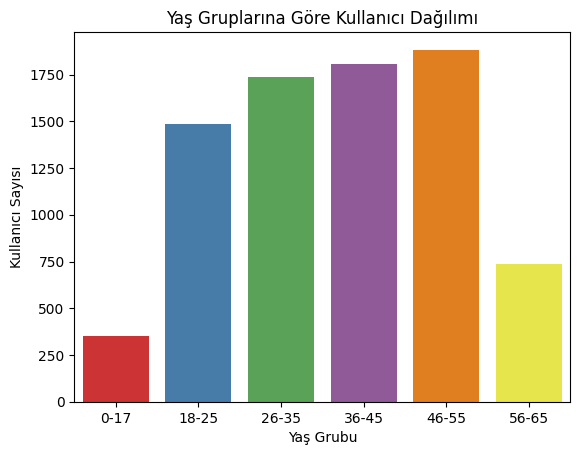

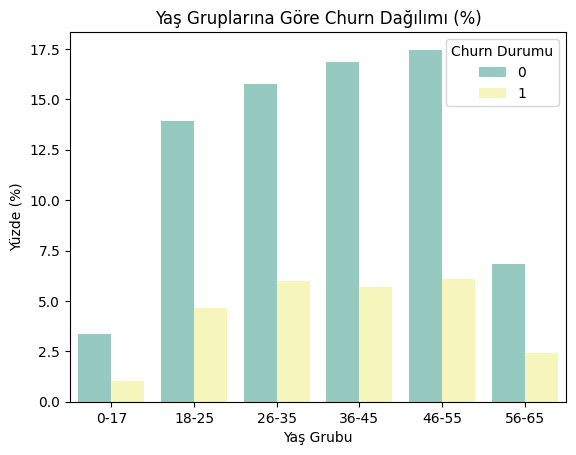

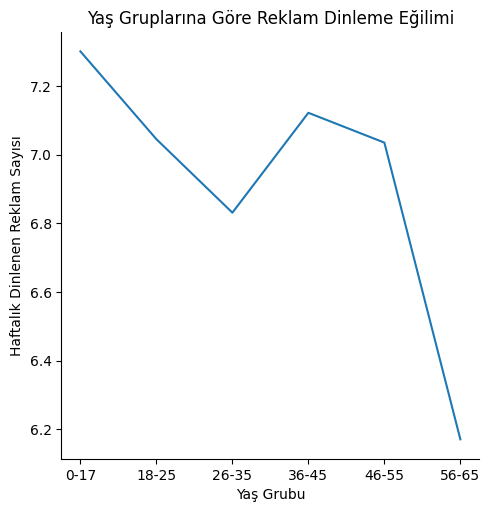

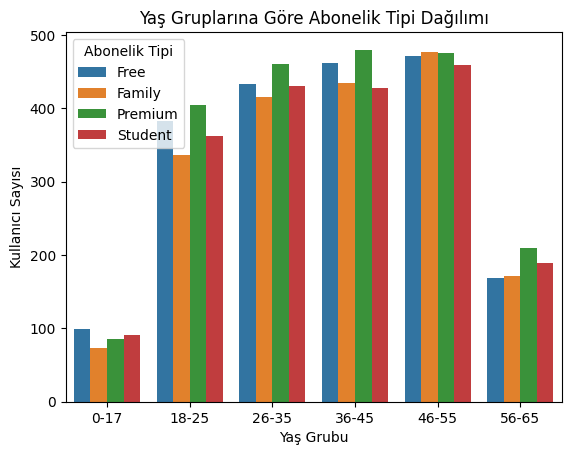

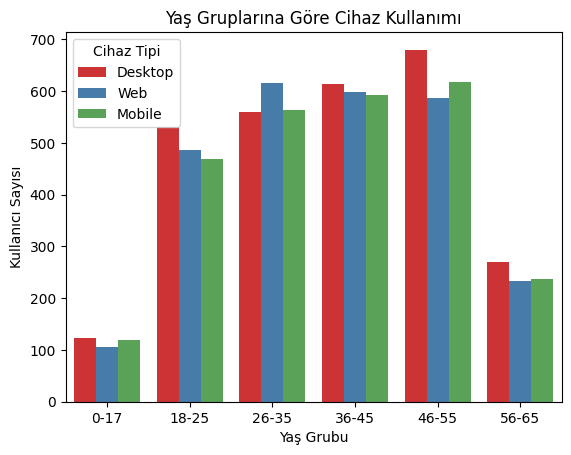

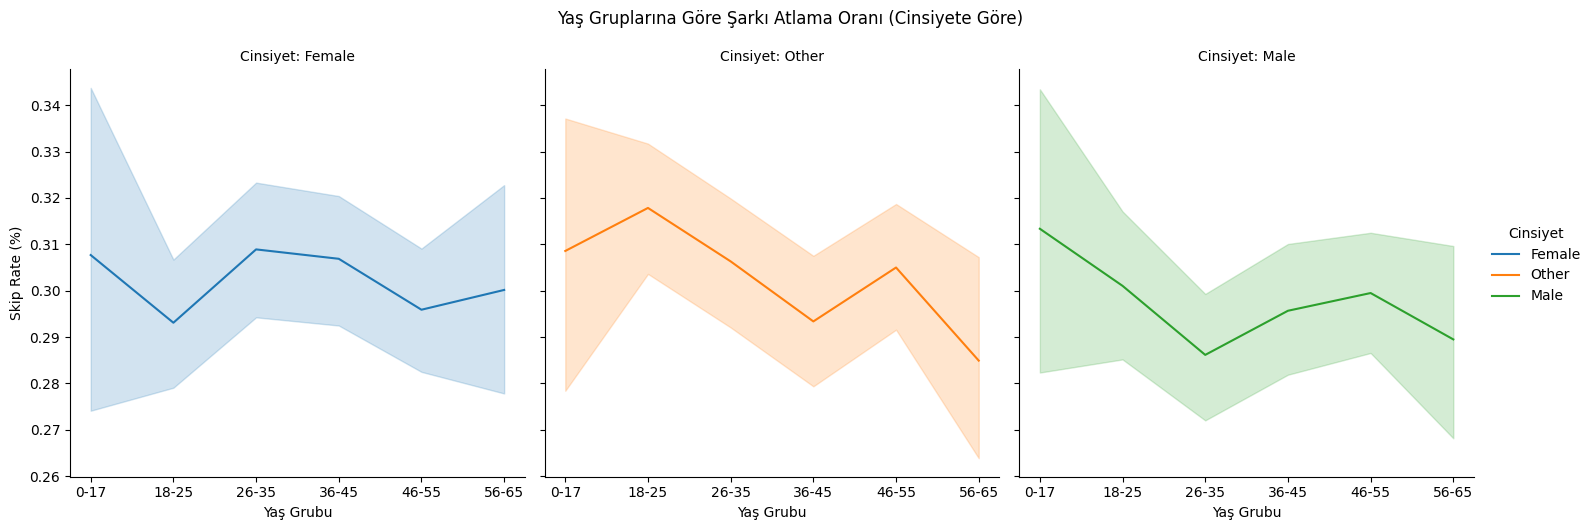

In [ ]:
# 1. Ya≈ü grubu daƒüƒ±lƒ±mƒ±
sns.countplot(data=df, x="age_group",palette="Set1")
plt.xlabel("Ya≈ü Grubu")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ±")
plt.title("Ya≈ü Gruplarƒ±na G√∂re Kullanƒ±cƒ± Daƒüƒ±lƒ±mƒ±")
plt.show()

# 2. Ya≈ü grubu ve churn y√ºzdesi
sns.countplot(data=df, x="age_group", palette="Set3", hue="is_churned", stat="percent")
plt.xlabel("Ya≈ü Grubu")
plt.ylabel("Y√ºzde (%)")
plt.title("Ya≈ü Gruplarƒ±na G√∂re Churn Daƒüƒ±lƒ±mƒ± (%)")
plt.legend(title="Churn Durumu")  # <--- hue ismi verildi
plt.show()

# 3. Ya≈ü grubu vs haftalƒ±k reklam dinleme
sns.relplot(data=df, x="age_group", y="ads_listened_per_week", kind="line",errorbar=None)
plt.xlabel("Ya≈ü Grubu")
plt.ylabel("Haftalƒ±k Dinlenen Reklam Sayƒ±sƒ±")
plt.title("Ya≈ü Gruplarƒ±na G√∂re Reklam Dinleme Eƒüilimi")
plt.show()

# 4. Ya≈ü grubu ve abonelik tipi
sns.countplot(data=df, x="age_group", hue="subscription_type")
plt.xlabel("Ya≈ü Grubu")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ±")
plt.title("Ya≈ü Gruplarƒ±na G√∂re Abonelik Tipi Daƒüƒ±lƒ±mƒ±")
plt.legend(title="Abonelik Tipi")  # <--- hue ismi verildi
plt.show()

# 5. Ya≈ü grubu ve cihaz tipi
sns.countplot(data=df, x="age_group", hue="device_type", palette="Set1")
plt.xlabel("Ya≈ü Grubu")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ±")
plt.title("Ya≈ü Gruplarƒ±na G√∂re Cihaz Kullanƒ±mƒ±")
plt.legend(title="Cihaz Tipi")  # <--- hue ismi verildi
plt.show()

# 6. Ya≈ü grubu vs skip_rate (cinsiyete g√∂re)
g = sns.relplot(data=df, x="age_group", y="skip_rate", kind="line", col="gender", hue="gender")
g.set_axis_labels("Ya≈ü Grubu", "Skip Rate (%)")
g.set_titles("Cinsiyet: {col_name}")
g.fig.suptitle("Ya≈ü Gruplarƒ±na G√∂re ≈ûarkƒ± Atlama Oranƒ± (Cinsiyete G√∂re)", y=1.05)
g._legend.set_title("Cinsiyet")
plt.show()



<!-- Cinsiyet Analizi - Ba≈ülƒ±k Kartƒ± -->
<style>
  .gender-hero{
    --bg: linear-gradient(135deg,#f7f9ff, #eef4ff);
    --fg:#0f172a; --muted:#475569; --ring:#c7d2fe; --accent:#4f46e5; --chip:#ffffff;
    border-radius:18px; padding:20px 22px; margin:16px 0 24px;
    background:var(--bg); border:1px solid #e5e7eb;
    box-shadow:0 8px 28px rgba(79,70,229,.10);
  }
  @media (prefers-color-scheme: dark){
    .gender-hero{
      --bg: linear-gradient(135deg,#0b1220,#111827);
      --fg:#e5e7eb; --muted:#94a3b8; --ring:#334155; --accent:#818cf8; --chip:#0f172a;
      border-color:#1f2937;
      box-shadow:0 8px 28px rgba(0,0,0,.45);
    }
  }
  .gender-hero h1{
    margin:0 0 6px; font:800 22px/1.25 ui-sans-serif,system-ui,Segoe UI,Roboto;
    color:var(--fg); display:flex; align-items:center; gap:10px; letter-spacing:.2px;
  }
  .gender-hero h1 .emoji{font-size:24px}
  .gender-hero p{
    margin:0 12px 12px 0; color:var(--muted); font:500 14px/1.5 system-ui;
  }
  .badges{display:flex; align-items:center; gap:10px; flex-wrap:wrap; margin-top:6px}
  .badge{
    display:inline-flex; align-items:center; gap:6px;
    font:700 11px/1 system-ui; color:var(--fg); background:rgba(129,140,248,.18);
    border:1px solid var(--ring); border-radius:10px; padding:6px 8px;
  }
  .pulse{
    width:8px; height:8px; border-radius:50%; background:var(--accent);
    box-shadow:0 0 0 0 rgba(129,140,248,.6); animation:pulse 2s infinite;
  }
  @keyframes pulse{
    0%{box-shadow:0 0 0 0 rgba(129,140,248,.6)}
    70%{box-shadow:0 0 0 10px rgba(129,140,248,0)}
    100%{box-shadow:0 0 0 0 rgba(129,140,248,0)}
  }
  .chips{display:flex; flex-wrap:wrap; gap:8px; margin-top:8px}
  .chip{
    font:600 12px/1 system-ui; color:var(--fg); background:var(--chip);
    border:1px solid var(--ring); border-radius:999px; padding:8px 10px;
    box-shadow:0 2px 10px rgba(0,0,0,.05)
  }
</style>

<div class="gender-hero">
  <h1><span class="emoji">üë©‚Äçü¶±üë®‚Äçü¶±</span> Cinsiyete G√∂re Kullanƒ±cƒ± Analizi</h1>
  <p>Bu b√∂l√ºmde <b>cinsiyet</b> ekseninde <b>churn daƒüƒ±lƒ±mƒ±</b>, <b>g√ºnl√ºk ≈üarkƒ± sayƒ±sƒ±</b>,
     <b>haftalƒ±k reklam dinleme</b> ve <b>g√ºnl√ºk dinleme s√ºresi</b> g√∂rselle≈ütirilmektedir.</p>
  <div class="badges">
    <span class="badge"><span class="pulse"></span> √ñzet</span>
    <span class="badge">Dataset: 8.000 kullanƒ±cƒ±</span>
  </div>
  <div class="chips" aria-label="Kapsanan konular">
    <span class="chip">Churn (%)</span>
    <span class="chip">Songs/Day</span>
    <span class="chip">Ads/Week</span>
    <span class="chip">Listening Time (dk)</span>
  </div>
</div>


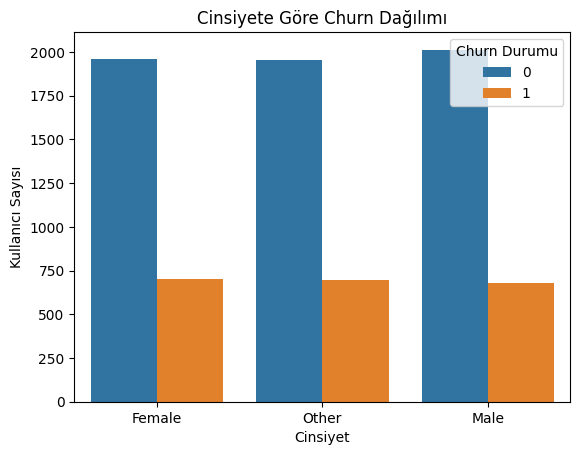

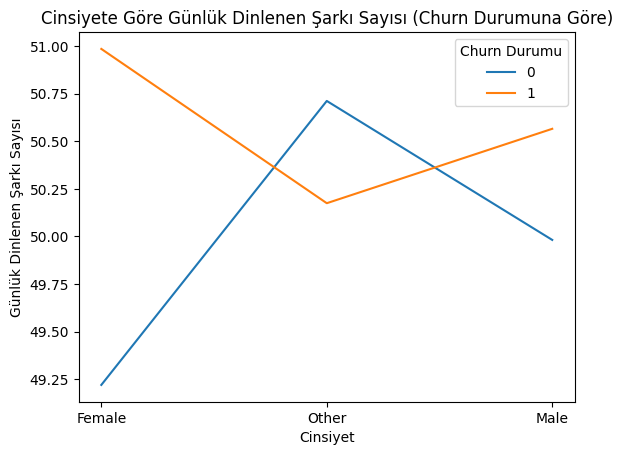

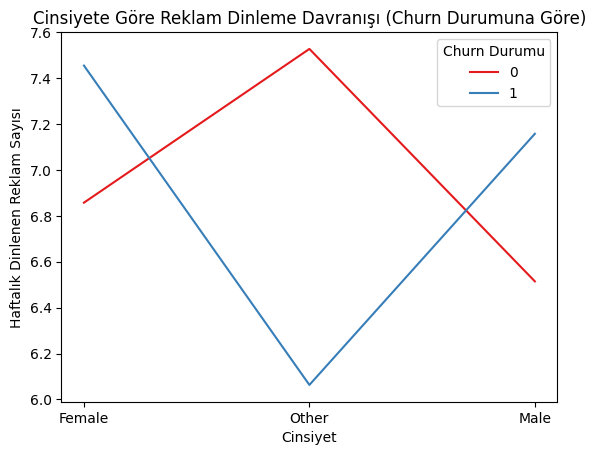

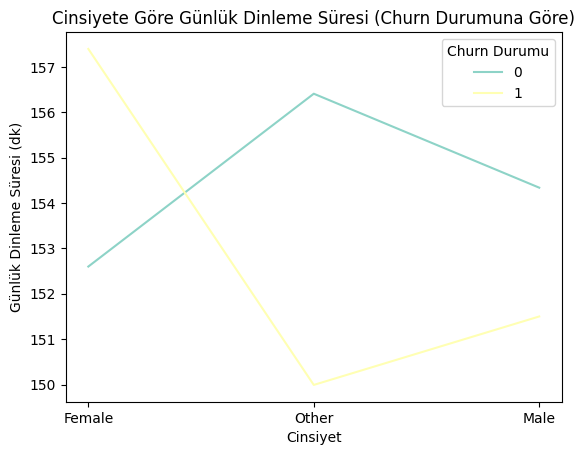

In [ ]:
# 1. Cinsiyet - churn daƒüƒ±lƒ±mƒ±
sns.countplot(data=df, x="gender", hue="is_churned")
plt.xlabel("Cinsiyet")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ±")
plt.title("Cinsiyete G√∂re Churn Daƒüƒ±lƒ±mƒ±")
plt.legend(title="Churn Durumu")
plt.show()
# 2. Cinsiyet - g√ºnl√ºk dinlenen ≈üarkƒ± sayƒ±sƒ± (churn'a g√∂re)
sns.lineplot(data=df, x="gender", y="songs_played_per_day", hue="is_churned", errorbar=None)
plt.xlabel("Cinsiyet")
plt.ylabel("G√ºnl√ºk Dinlenen ≈ûarkƒ± Sayƒ±sƒ±")
plt.title("Cinsiyete G√∂re G√ºnl√ºk Dinlenen ≈ûarkƒ± Sayƒ±sƒ± (Churn Durumuna G√∂re)")
plt.legend(title="Churn Durumu")
plt.show()
# 3. Cinsiyet - haftalƒ±k reklam dinleme (churn'a g√∂re)
sns.lineplot(data=df, x="gender", y="ads_listened_per_week", hue="is_churned", palette="Set1", errorbar=None)
plt.xlabel("Cinsiyet")
plt.ylabel("Haftalƒ±k Dinlenen Reklam Sayƒ±sƒ±")
plt.title("Cinsiyete G√∂re Reklam Dinleme Davranƒ±≈üƒ± (Churn Durumuna G√∂re)")
plt.legend(title="Churn Durumu")
plt.show()
# 4. Cinsiyet - g√ºnl√ºk dinleme s√ºresi (churn'a g√∂re)
sns.lineplot(data=df, x="gender", y="listening_time", hue="is_churned", errorbar=None, palette="Set3")
plt.xlabel("Cinsiyet")
plt.ylabel("G√ºnl√ºk Dinleme S√ºresi (dk)")
plt.title("Cinsiyete G√∂re G√ºnl√ºk Dinleme S√ºresi (Churn Durumuna G√∂re)")
plt.legend(title="Churn Durumu")
plt.show()

<!-- √úlke Analizi - Ba≈ülƒ±k Kartƒ± -->
<style>
  .country-hero{
    --bg: linear-gradient(135deg,#fefefe,#f0f9ff);
    --fg:#0f172a; --muted:#475569; --accent:#0284c7; --ring:#bae6fd; --chip:#ffffff;
    border-radius:18px; padding:20px 22px; margin:18px 0 28px;
    background:var(--bg); border:1px solid #e2e8f0;
    box-shadow:0 8px 28px rgba(2,132,199,.15);
  }
  @media (prefers-color-scheme: dark){
    .country-hero{
      --bg: linear-gradient(135deg,#0f172a,#1e293b);
      --fg:#f1f5f9; --muted:#94a3b8; --accent:#38bdf8; --ring:#334155; --chip:#1e293b;
      border-color:#334155;
      box-shadow:0 8px 28px rgba(0,0,0,.5);
    }
  }
  .country-hero h1{
    margin:0 0 6px; font:800 22px/1.25 ui-sans-serif,system-ui,Segoe UI,Roboto;
    color:var(--fg); display:flex; align-items:center; gap:10px;
  }
  .country-hero h1 .emoji{font-size:26px}
  .country-hero p{
    margin:0 0 12px; color:var(--muted); font:500 14px/1.5 system-ui;
  }
  .chips{display:flex; flex-wrap:wrap; gap:8px}
  .chip{
    font:600 12px/1 system-ui; color:var(--fg); background:var(--chip);
    border:1px solid var(--ring); border-radius:999px; padding:7px 10px;
    box-shadow:0 2px 10px rgba(0,0,0,.05)
  }
</style>

<div class="country-hero">
  <h1><span class="emoji">üåç</span> √úlkelere G√∂re Kullanƒ±cƒ± Analizi</h1>
  <p>Bu b√∂l√ºmde kullanƒ±cƒ±larƒ±n <b>√ºlke bazƒ±nda</b> davranƒ±≈ü kalƒ±plarƒ± incelenmektedir:
     cinsiyet daƒüƒ±lƒ±mƒ±, churn oranlarƒ±, reklam dinleme, dinleme s√ºreleri, ≈üarkƒ± atlama,
     √ßevrimdƒ±≈üƒ± dinleme ve abonelik tipleri.</p>
  <div class="chips">
    <span class="chip">Cinsiyet</span>
    <span class="chip">Churn (%)</span>
    <span class="chip">Reklam</span>
    <span class="chip">Dinleme S√ºresi</span>
    <span class="chip">≈ûarkƒ± Sayƒ±sƒ±</span>
    <span class="chip">Skip Rate</span>
    <span class="chip">√áevrimdƒ±≈üƒ±</span>
    <span class="chip">Abonelik Tipi</span>
  </div>
</div>


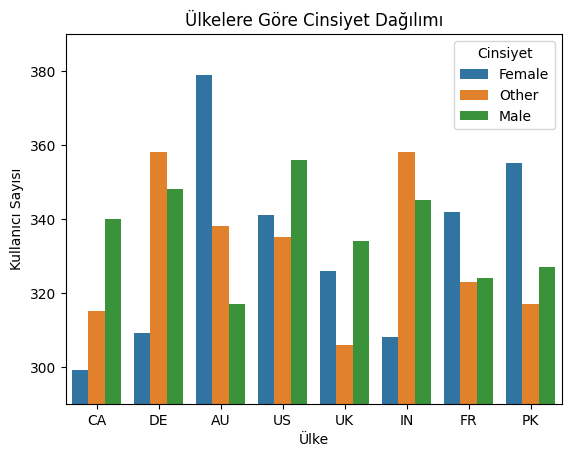

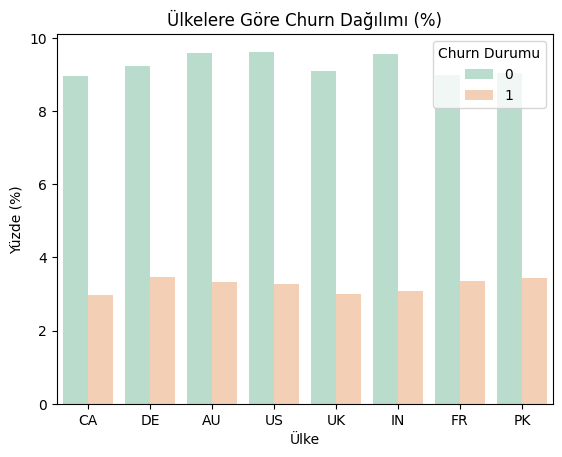

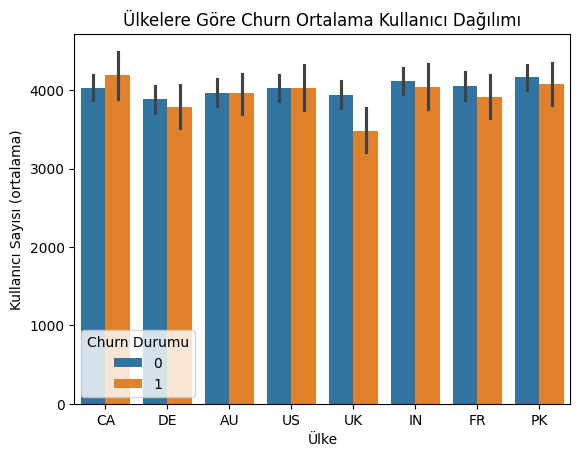

C:\Users\user\AppData\Local\Temp\ipykernel_16508\19771827.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="country", y="ads_listened_per_week", errorbar=None,palette="deep")


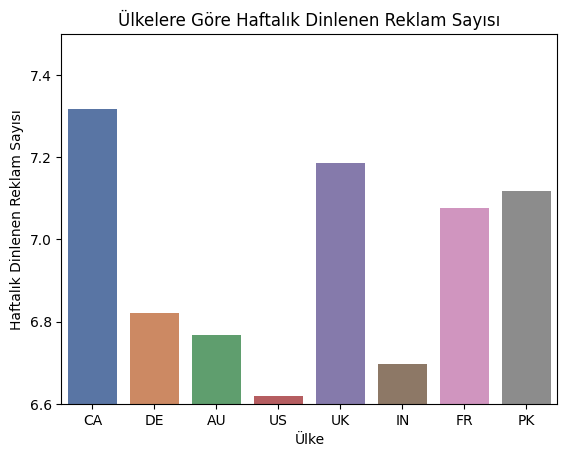

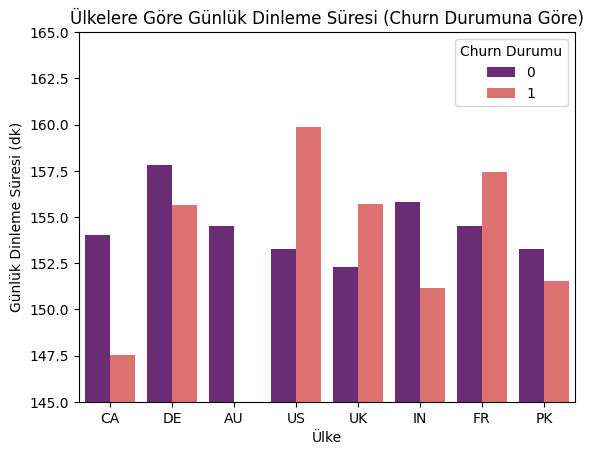

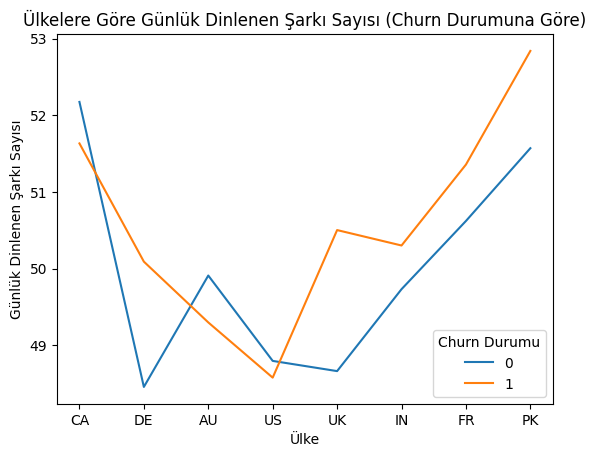

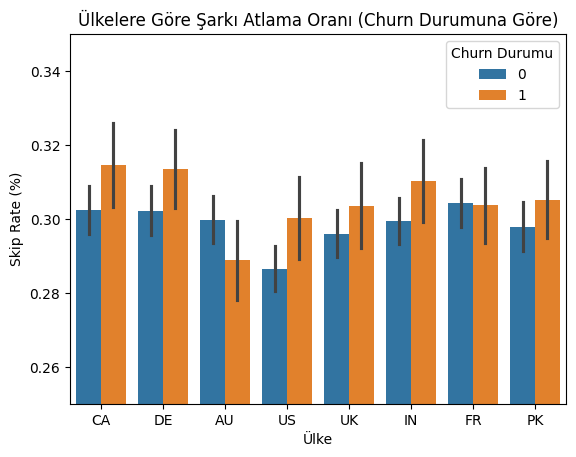

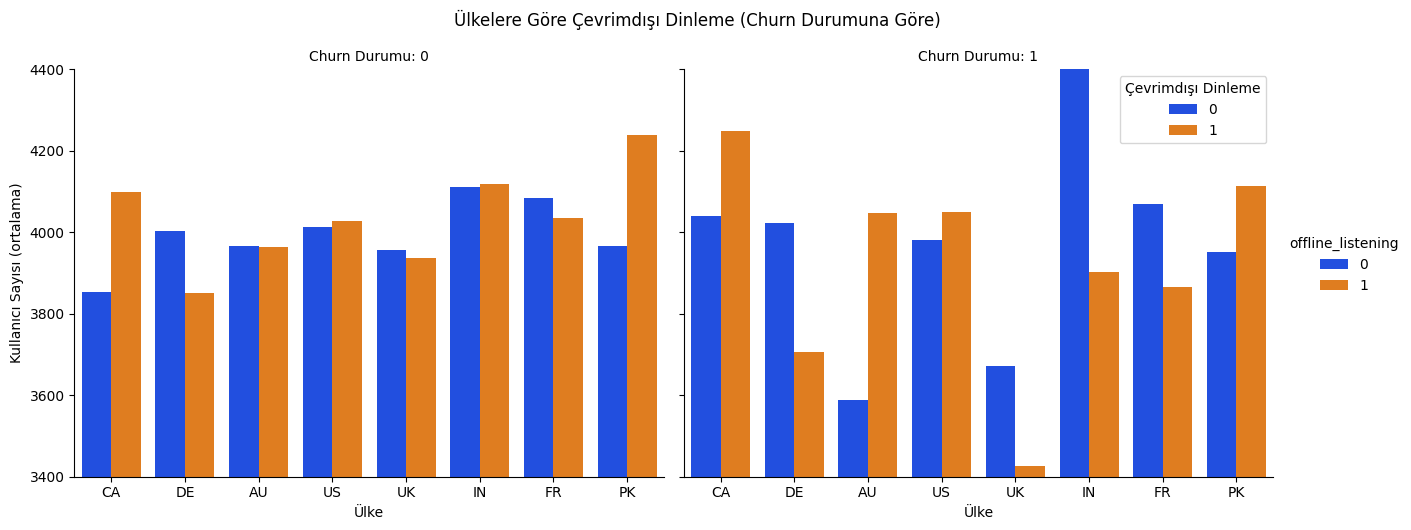

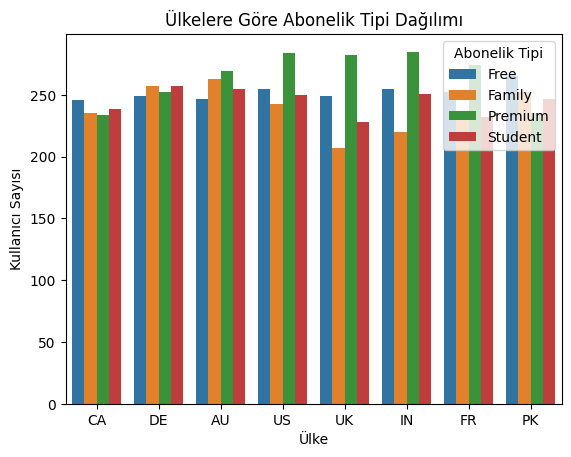

In [ ]:
# 1. √úlke - Cinsiyet daƒüƒ±lƒ±mƒ±
sns.countplot(data=df, x="country", hue="gender")
plt.xlabel("√úlke")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ±")
plt.title("√úlkelere G√∂re Cinsiyet Daƒüƒ±lƒ±mƒ±")
plt.ylim(290, 390)
plt.legend(title="Cinsiyet")
plt.show()
# 2. √úlke - Churn y√ºzdesi
sns.countplot(data=df, x="country", hue="is_churned", stat="percent", palette="Pastel2")
plt.xlabel("√úlke")
plt.ylabel("Y√ºzde (%)")
plt.title("√úlkelere G√∂re Churn Daƒüƒ±lƒ±mƒ± (%)")
plt.legend(title="Churn Durumu")
plt.show()
# 3. √úlke - Kullanƒ±cƒ± ba≈üƒ±na churn
sns.barplot(data=df, x="country", hue="is_churned", y="user_id")
plt.xlabel("√úlke")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ± (ortalama)")
plt.title("√úlkelere G√∂re Churn Ortalama Kullanƒ±cƒ± Daƒüƒ±lƒ±mƒ±")
plt.legend(title="Churn Durumu")
plt.show()
# 4. √úlke - Haftalƒ±k reklam dinleme
sns.barplot(data=df, x="country", y="ads_listened_per_week", errorbar=None,palette="deep")
plt.xlabel("√úlke")
plt.ylabel("Haftalƒ±k Dinlenen Reklam Sayƒ±sƒ±")
plt.title("√úlkelere G√∂re Haftalƒ±k Dinlenen Reklam Sayƒ±sƒ±")
plt.ylim(6.6, 7.5)
plt.show()
# 5. √úlke - G√ºnl√ºk dinleme s√ºresi (churn'a g√∂re)
sns.barplot(data=df, x="country", hue="is_churned", y="listening_time", errorbar=None,palette="magma")
plt.xlabel("√úlke")
plt.ylabel("G√ºnl√ºk Dinleme S√ºresi (dk)")
plt.title("√úlkelere G√∂re G√ºnl√ºk Dinleme S√ºresi (Churn Durumuna G√∂re)")
plt.ylim(145, 165)
plt.legend(title="Churn Durumu")
plt.show()
# 6. √úlke - G√ºnl√ºk ≈üarkƒ± sayƒ±sƒ± (churn'a g√∂re)
sns.lineplot(data=df, x="country", y="songs_played_per_day", hue="is_churned", errorbar=None)
plt.xlabel("√úlke")
plt.ylabel("G√ºnl√ºk Dinlenen ≈ûarkƒ± Sayƒ±sƒ±")
plt.title("√úlkelere G√∂re G√ºnl√ºk Dinlenen ≈ûarkƒ± Sayƒ±sƒ± (Churn Durumuna G√∂re)")
plt.legend(title="Churn Durumu")
plt.show()
# 7. √úlke - Skip rate (churn'a g√∂re)
sns.barplot(data=df, x="country", y="skip_rate", hue="is_churned", errorbar="se")
plt.xlabel("√úlke")
plt.ylabel("Skip Rate (%)")
plt.title("√úlkelere G√∂re ≈ûarkƒ± Atlama Oranƒ± (Churn Durumuna G√∂re)")
plt.ylim(0.25, 0.35)
plt.legend(title="Churn Durumu")
plt.show()
# 8. √úlke - √áevrimdƒ±≈üƒ± dinleme (churn'a g√∂re, facet)
g = sns.catplot(
    data=df,
    x="country", y="user_id", hue="offline_listening",
    col="is_churned", kind="bar", height=5, aspect=1.3,
    errorbar=None, estimator=np.mean,palette="bright"
)
g.set_axis_labels("√úlke", "Kullanƒ±cƒ± Sayƒ±sƒ± (ortalama)")
g.set_titles("Churn Durumu: {col_name}")
g.fig.suptitle("√úlkelere G√∂re √áevrimdƒ±≈üƒ± Dinleme (Churn Durumuna G√∂re)", y=1.05)
plt.ylim(3400, 4400)
plt.legend(title="√áevrimdƒ±≈üƒ± Dinleme")
plt.show()

# 9. √úlke - Abonelik tipi daƒüƒ±lƒ±mƒ±
sns.countplot(data=df, hue="subscription_type", x="country")
plt.xlabel("√úlke")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ±")
plt.title("√úlkelere G√∂re Abonelik Tipi Daƒüƒ±lƒ±mƒ±")
plt.legend(title="Abonelik Tipi")
plt.show()

<!-- Cihaz Tipi Analizi - Ba≈ülƒ±k Kartƒ± -->
<style>
  .device-hero{
    --bg: linear-gradient(135deg,#fafcff,#eef6ff);
    --fg:#0f172a; --muted:#475569; --accent:#16a34a; --ring:#bbf7d0; --chip:#ffffff;
    border-radius:18px; padding:20px 22px; margin:18px 0 28px;
    background:var(--bg); border:1px solid #e2e8f0;
    box-shadow:0 8px 28px rgba(22,163,74,.15);
  }
  @media (prefers-color-scheme: dark){
    .device-hero{
      --bg: linear-gradient(135deg,#0f172a,#1e293b);
      --fg:#f1f5f9; --muted:#94a3b8; --accent:#4ade80; --ring:#334155; --chip:#1e293b;
      border-color:#334155;
      box-shadow:0 8px 28px rgba(0,0,0,.5);
    }
  }
  .device-hero h1{
    margin:0 0 6px; font:800 22px/1.25 ui-sans-serif,system-ui,Segoe UI,Roboto;
    color:var(--fg); display:flex; align-items:center; gap:10px;
  }
  .device-hero h1 .emoji{font-size:26px}
  .device-hero p{
    margin:0 0 12px; color:var(--muted); font:500 14px/1.5 system-ui;
  }
  .chips{display:flex; flex-wrap:wrap; gap:8px}
  .chip{
    font:600 12px/1 system-ui; color:var(--fg); background:var(--chip);
    border:1px solid var(--ring); border-radius:999px; padding:7px 10px;
    box-shadow:0 2px 10px rgba(0,0,0,.05)
  }
</style>

<div class="device-hero">
  <h1><span class="emoji">üíªüì±</span> Cihaz Tipine G√∂re Kullanƒ±cƒ± Analizi</h1>
  <p>Bu b√∂l√ºmde kullanƒ±cƒ±larƒ±n <b>cihaz tipine g√∂re</b> davranƒ±≈ü kalƒ±plarƒ± incelenmektedir:
     reklam dinleme, churn daƒüƒ±lƒ±mƒ±, √ßevrimdƒ±≈üƒ± kullanƒ±m, dinleme s√ºreleri ve abonelik tipi.</p>
  <div class="chips">
    <span class="chip">Reklam</span>
    <span class="chip">Churn (%)</span>
    <span class="chip">√áevrimdƒ±≈üƒ±</span>
    <span class="chip">Dinleme S√ºresi</span>
    <span class="chip">Abonelik Tipi</span>
  </div>
</div>


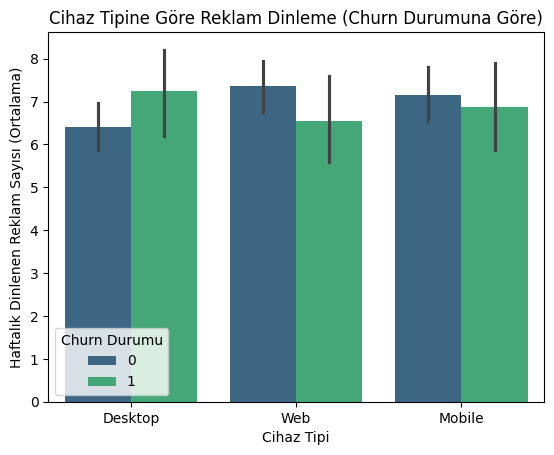

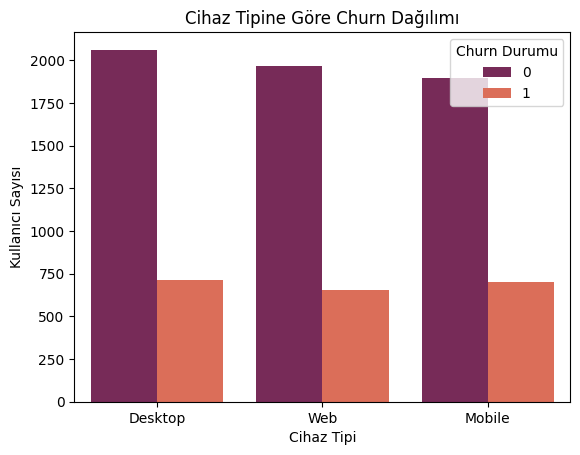

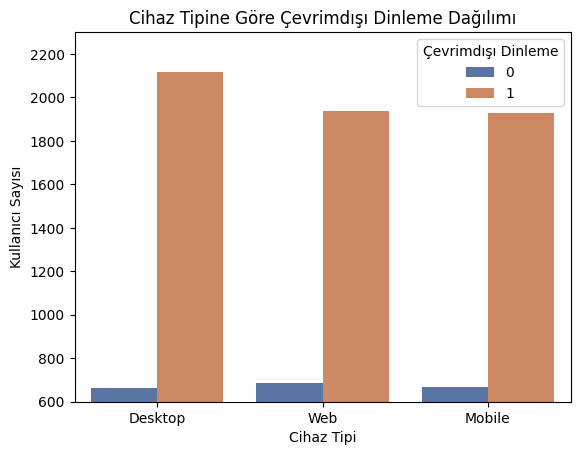

C:\Users\user\AppData\Local\Temp\ipykernel_16508\3544841112.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="device_type", y="listening_time", palette="muted")


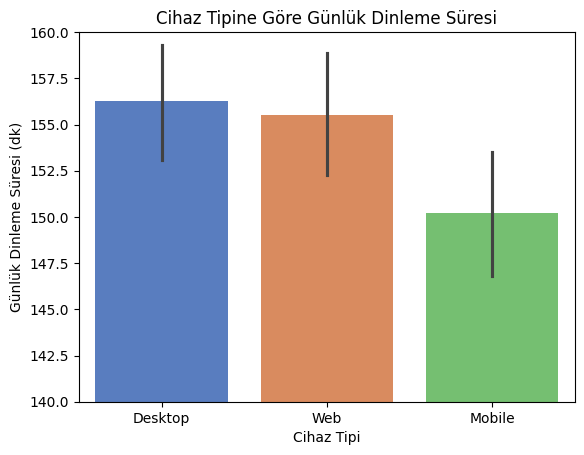

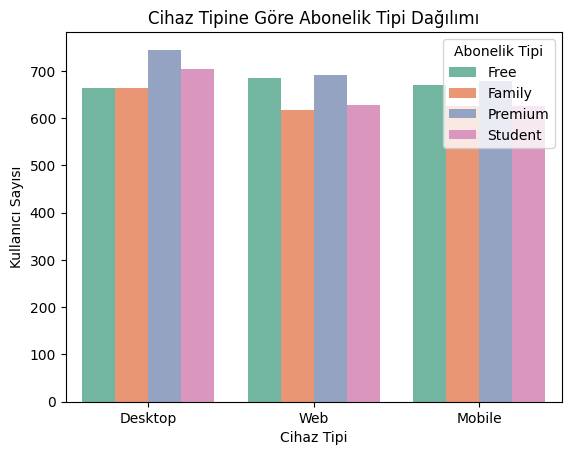

In [ ]:
# 1. Cihaz tipi - haftalƒ±k reklam dinleme (churn'a g√∂re)
sns.barplot(
    data=df, x="device_type", y="ads_listened_per_week",
    hue="is_churned", estimator=np.mean, palette="viridis"
)
plt.xlabel("Cihaz Tipi")
plt.ylabel("Haftalƒ±k Dinlenen Reklam Sayƒ±sƒ± (Ortalama)")
plt.title("Cihaz Tipine G√∂re Reklam Dinleme (Churn Durumuna G√∂re)")
plt.legend(title="Churn Durumu")
plt.show()

# 2. Cihaz tipi - churn daƒüƒ±lƒ±mƒ±
sns.countplot(data=df, x="device_type", hue="is_churned", palette="rocket")
plt.xlabel("Cihaz Tipi")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ±")
plt.title("Cihaz Tipine G√∂re Churn Daƒüƒ±lƒ±mƒ±")
plt.legend(title="Churn Durumu")
plt.show()

# 3. Cihaz tipi - offline listening daƒüƒ±lƒ±mƒ±
sns.countplot(data=df, x="device_type", hue="offline_listening", palette="deep")
plt.xlabel("Cihaz Tipi")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ±")
plt.title("Cihaz Tipine G√∂re √áevrimdƒ±≈üƒ± Dinleme Daƒüƒ±lƒ±mƒ±")
plt.ylim(600, 2300)
plt.legend(title="√áevrimdƒ±≈üƒ± Dinleme")
plt.show()

# 4. Cihaz tipi - g√ºnl√ºk dinleme s√ºresi
sns.barplot(data=df, x="device_type", y="listening_time", palette="muted")
plt.xlabel("Cihaz Tipi")
plt.ylabel("G√ºnl√ºk Dinleme S√ºresi (dk)")
plt.title("Cihaz Tipine G√∂re G√ºnl√ºk Dinleme S√ºresi")
plt.ylim(140, 160)
plt.show()

# 5. Cihaz tipi - abonelik tipi daƒüƒ±lƒ±mƒ±
sns.countplot(data=df, x="device_type", hue="subscription_type", palette="Set2")
plt.xlabel("Cihaz Tipi")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ±")
plt.title("Cihaz Tipine G√∂re Abonelik Tipi Daƒüƒ±lƒ±mƒ±")
plt.legend(title="Abonelik Tipi")
plt.show()


<!-- Abonelik Tipi Analizi - Ba≈ülƒ±k Kartƒ± -->
<style>
  .sub-hero{
    --bg: linear-gradient(135deg,#fffdfb,#f0f9ff);
    --fg:#0f172a; --muted:#475569; --accent:#d946ef; --ring:#fbcfe8; --chip:#ffffff;
    border-radius:18px; padding:20px 22px; margin:18px 0 28px;
    background:var(--bg); border:1px solid #e2e8f0;
    box-shadow:0 8px 28px rgba(217,70,239,.15);
  }
  @media (prefers-color-scheme: dark){
    .sub-hero{
      --bg: linear-gradient(135deg,#0f172a,#1e293b);
      --fg:#f1f5f9; --muted:#94a3b8; --accent:#e879f9; --ring:#334155; --chip:#1e293b;
      border-color:#334155;
      box-shadow:0 8px 28px rgba(0,0,0,.5);
    }
  }
  .sub-hero h1{
    margin:0 0 6px; font:800 22px/1.25 ui-sans-serif,system-ui,Segoe UI,Roboto;
    color:var(--fg); display:flex; align-items:center; gap:10px;
  }
  .sub-hero h1 .emoji{font-size:26px}
  .sub-hero p{
    margin:0 0 12px; color:var(--muted); font:500 14px/1.5 system-ui;
  }
  .chips{display:flex; flex-wrap:wrap; gap:8px}
  .chip{
    font:600 12px/1 system-ui; color:var(--fg); background:var(--chip);
    border:1px solid var(--ring); border-radius:999px; padding:7px 10px;
    box-shadow:0 2px 10px rgba(0,0,0,.05)
  }
</style>

<div class="sub-hero">
  <h1><span class="emoji">üí≥</span> Abonelik Tipine G√∂re Kullanƒ±cƒ± Analizi</h1>
  <p>Bu b√∂l√ºmde kullanƒ±cƒ±larƒ±n <b>abonelik tipine g√∂re</b> churn oranlarƒ± ve
     cinsiyet daƒüƒ±lƒ±mlarƒ± incelenmektedir.</p>
  <div class="chips">
    <span class="chip">Churn (%)</span>
    <span class="chip">Cinsiyet</span>
  </div>
</div>


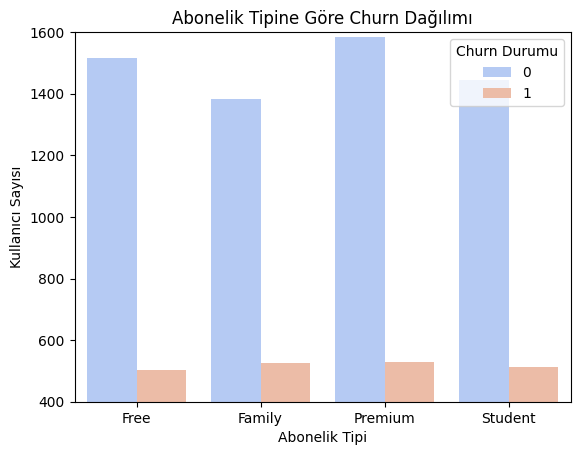

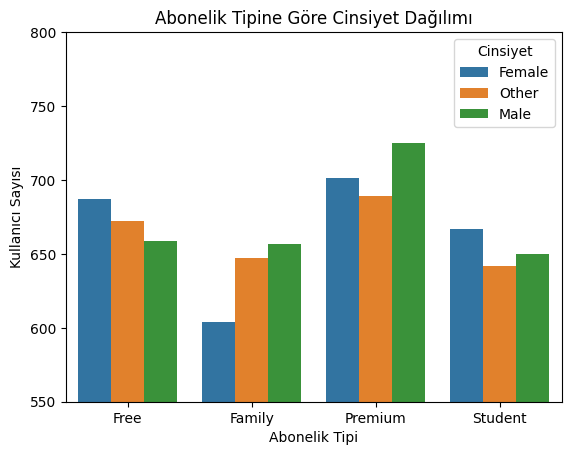

In [ ]:
# 1. Abonelik tipi - churn daƒüƒ±lƒ±mƒ±
sns.countplot(data=df, x="subscription_type", palette="coolwarm", hue="is_churned")
plt.xlabel("Abonelik Tipi")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ±")
plt.title("Abonelik Tipine G√∂re Churn Daƒüƒ±lƒ±mƒ±")
plt.ylim(400, 1600)
plt.legend(title="Churn Durumu")
plt.show()

# 2. Abonelik tipi - cinsiyet daƒüƒ±lƒ±mƒ±
sns.countplot(data=df, x="subscription_type", hue="gender")
plt.xlabel("Abonelik Tipi")
plt.ylabel("Kullanƒ±cƒ± Sayƒ±sƒ±")
plt.title("Abonelik Tipine G√∂re Cinsiyet Daƒüƒ±lƒ±mƒ±")
plt.ylim(550, 800)
plt.legend(title="Cinsiyet")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   user_id                8000 non-null   int64   
 1   gender                 8000 non-null   object  
 2   age                    8000 non-null   int64   
 3   country                8000 non-null   object  
 4   subscription_type      8000 non-null   object  
 5   listening_time         8000 non-null   int64   
 6   songs_played_per_day   8000 non-null   int64   
 7   skip_rate              8000 non-null   float64 
 8   device_type            8000 non-null   object  
 9   ads_listened_per_week  8000 non-null   int64   
 10  offline_listening      8000 non-null   object  
 11  is_churned             8000 non-null   int64   
 12  age_group              8000 non-null   category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 758.2+ KB


In [ ]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

X=df.drop(["user_id","is_churned"],axis=1)
y=df["is_churned"]

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
encoder = TargetEncoder()
x_train=encoder.fit_transform(x_train,y_train)
x_test=encoder.transform(x_test)


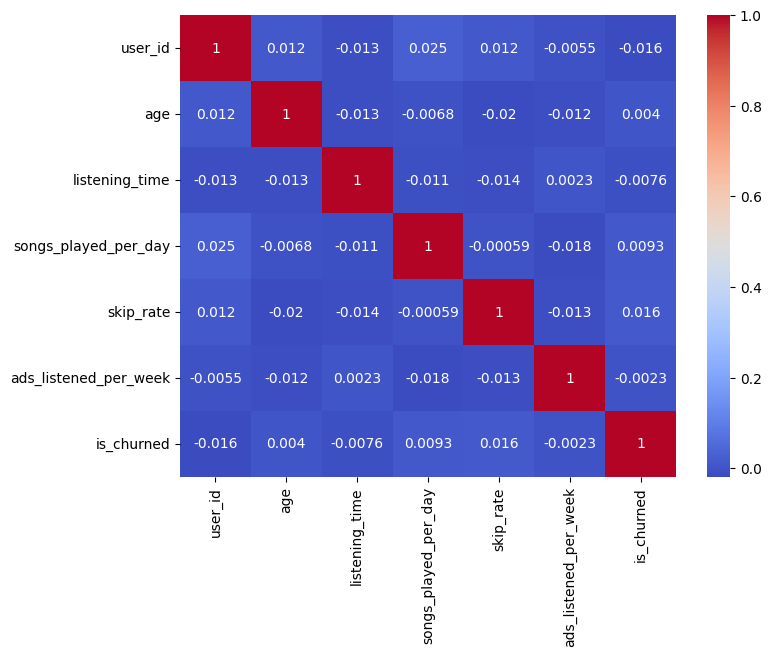

In [ ]:

corr=df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:34:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


En iyi parametreler: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}

Doƒüruluk: 0.7125

Sƒ±nƒ±flandƒ±rma Raporu:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83      1200
           1       0.30      0.12      0.17       400

    accuracy                           0.71      1600
   macro avg       0.53      0.51      0.50      1600
weighted avg       0.64      0.71      0.66      1600


Confusion Matrix:
 [[1094  106]
 [ 354   46]]


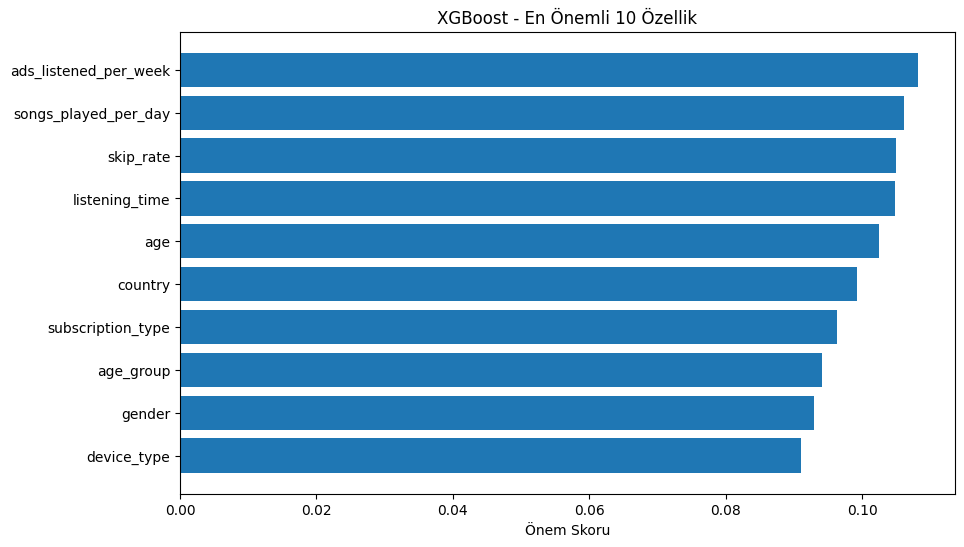

In [ ]:
# K√ºt√ºphaneler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Model
xgb = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Parametre arama
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(x_test)

print("\nDoƒüruluk:", accuracy_score(y_test, y_pred))
print("\nSƒ±nƒ±flandƒ±rma Raporu:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# √ñzellik √∂nem grafiƒüi
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'][:10][::-1], feature_importance['Importance'][:10][::-1])
plt.xlabel("√ñnem Skoru")
plt.title("XGBoost - En √ñnemli 10 √ñzellik")
plt.show()


In [ ]:
from xgboost import XGBClassifier

xgb_best_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.7,
    colsample_bytree=1.0,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_best_model.fit(x_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = xgb_best_model.predict(x_test)

print(" Doƒüruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("\n Sƒ±nƒ±flandƒ±rma Raporu:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:35:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


üìà Doƒüruluk (Accuracy): 0.7125

üìä Sƒ±nƒ±flandƒ±rma Raporu:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83      1200
           1       0.30      0.12      0.17       400

    accuracy                           0.71      1600
   macro avg       0.53      0.51      0.50      1600
weighted avg       0.64      0.71      0.66      1600


üß© Confusion Matrix:
 [[1094  106]
 [ 354   46]]


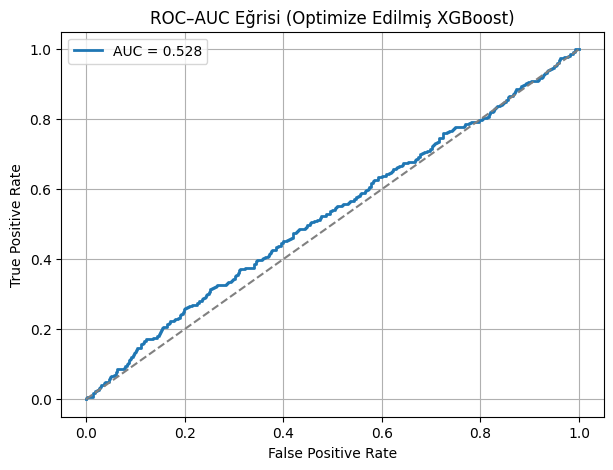

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = xgb_best_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC‚ÄìAUC Eƒürisi (Optimize Edilmi≈ü XGBoost)")
plt.legend()
plt.grid(True)
plt.show()
